In [1]:
# from google.colab import files

# # Prompt user to upload a folder
# uploaded = files.upload()

In [2]:
import zipfile

# zip_ref = zipfile.ZipFile("/content/bbc_dataset.zip", 'r')
# zip_ref.extractall("/content")
# zip_ref.close()

# zip_ref = zipfile.ZipFile(r"C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\bbc_dataset.zip", 'r')
# zip_ref.extractall(r"C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2")
# zip_ref.close()

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#input data files are available in the read-only "content/../" directory
import os
# for dirname, _, filenames in os.walk('/content/BBC News Summary'):
for dirname, _, filenames in os.walk(r"C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary"):
  for filename in filenames:
    print(os.path.join(dirname, filename))

C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\BBC News Summary\News Articles\business\001.txt
C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\BBC News Summary\News Articles\business\002.txt
C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\BBC News Summary\News Articles\business\003.txt
C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\BBC News Summary\News Articles\business\004.txt
C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\BBC News Summary\News Articles\business\005.txt
C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\BBC News Summary\News Articles\business\006.txt
C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\BBC News Summary\News Articles\business\007.txt
C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\BBC News Summary\News Articles\business\

In [4]:
import os
import time
import glob
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
os.listdir(r"C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\Summaries")

['business', 'entertainment', 'politics', 'sport', 'tech']

In [6]:
# article_path, summaries_path, categories_list, filename_, categories_list = [], [], [], [], []
articles_path = r"C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\News Articles"
summaries_path = r"C:\Users\seoeunl\Desktop\University of Surrey\2023-2024\FYP2\BBC News Summary\Summaries"
categories_list = ['sport', 'entertainment', 'politics', 'business', 'tech']
# filename_ = filename


In [7]:
#  df = pd.DataFrame({"article_path":article_path, "summaries_path":summaries_path, "filename":filename_, "category list":categories_list}, columns=["article_path", "summaries path", "filename", "category", "article_or_summary"])
# df

In [8]:
def read_files(articles_path, summaries_path, categories_list=['sport', 'entertainment', 'politics', 'business', 'tech'], encoding = "ISO-8859-1"):
  articles=[]
  summaries=[]
  categories = []
  for category in categories_list:
    article_paths = glob.glob(os.path.join(articles_path, category, '*.txt'), recursive=True)
    print(f"this is article paths: {article_paths}")
    summary_paths = glob.glob(os.path.join(summaries_path, category, '*.txt'), recursive=True)

    print(f'found {len(article_paths)} file in articles/{category} folder, {len(summary_paths)} file in summaries/{category}' )

    if len(article_paths) != len(summary_paths):
      print('number of files is not equal')
      return
    #check if each article has a summary
    for idx_file in range(len(article_paths)):
      categories.append(category)
      with open(article_paths[idx_file], mode = 'r', encoding = encoding) as file:
        articles.append(file.read())

      with open(summary_paths[idx_file], mode = 'r', encoding = encoding) as file:
        summaries.append(file.read())
  print(f'total {len(articles)} file in articles folders, {len(summaries)} file in summaries folders')
  return articles, summaries, categories

In [9]:
articles, summaries, categories = read_files(articles_path, summaries_path, categories_list)

this is article paths: ['C:\\Users\\seoeunl\\Desktop\\University of Surrey\\2023-2024\\FYP2\\BBC News Summary\\News Articles\\sport\\001.txt', 'C:\\Users\\seoeunl\\Desktop\\University of Surrey\\2023-2024\\FYP2\\BBC News Summary\\News Articles\\sport\\002.txt', 'C:\\Users\\seoeunl\\Desktop\\University of Surrey\\2023-2024\\FYP2\\BBC News Summary\\News Articles\\sport\\003.txt', 'C:\\Users\\seoeunl\\Desktop\\University of Surrey\\2023-2024\\FYP2\\BBC News Summary\\News Articles\\sport\\004.txt', 'C:\\Users\\seoeunl\\Desktop\\University of Surrey\\2023-2024\\FYP2\\BBC News Summary\\News Articles\\sport\\005.txt', 'C:\\Users\\seoeunl\\Desktop\\University of Surrey\\2023-2024\\FYP2\\BBC News Summary\\News Articles\\sport\\006.txt', 'C:\\Users\\seoeunl\\Desktop\\University of Surrey\\2023-2024\\FYP2\\BBC News Summary\\News Articles\\sport\\007.txt', 'C:\\Users\\seoeunl\\Desktop\\University of Surrey\\2023-2024\\FYP2\\BBC News Summary\\News Articles\\sport\\008.txt', 'C:\\Users\\seoeunl\\Des

In [10]:
df = pd.DataFrame({'articles':articles, 'summaries':summaries, 'categories':categories}, )
df

,articles,summaries,categories
0,Claxton hunting first major medal\n\nBritish h...,"For the first time, Claxton has only been prep...",sport
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,"The participation of O'Sullivan, currentily tr...",sport
2,Greene sets sights on world title\n\nMaurice G...,I think when I was coming up I would say there...,sport
3,IAAF launches fight against drugs\n\nThe IAAF ...,"""I am very happy to see you all, members of th...",sport
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",Ethiopia's Tirunesh Dibaba set a new world rec...,sport
...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...,tech
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...,tech
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...,tech


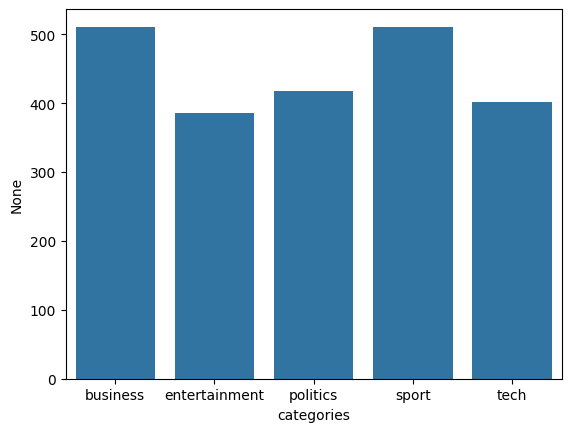

In [11]:
category_sizes = df.groupby('categories').size()
sns.barplot(x=category_sizes.index, y= category_sizes)
plt.show()

In [12]:
#-- get length of each article and summary for analysis
df['articles_length'] = df['articles'].apply(lambda x : len(x.split()))
df['summaries_length'] = df['summaries'].apply(lambda x : len(x.split()))

In [13]:
df

,articles,summaries,categories,articles_length,summaries_length
0,Claxton hunting first major medal\n\nBritish h...,"For the first time, Claxton has only been prep...",sport,211,91
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,"The participation of O'Sullivan, currentily tr...",sport,144,49
2,Greene sets sights on world title\n\nMaurice G...,I think when I was coming up I would say there...,sport,377,177
3,IAAF launches fight against drugs\n\nThe IAAF ...,"""I am very happy to see you all, members of th...",sport,195,99
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",Ethiopia's Tirunesh Dibaba set a new world rec...,sport,161,75
...,...,...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...,tech,420,186
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...,tech,357,130
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...,tech,1050,475
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...,tech,379,137


In [14]:
category_length = df.groupby('categories', 0).agg({'articles_length':'mean', 'summaries_length':'mean'})
category_length

C:\Users\seoeunl\AppData\Local\Temp\ipykernel_448172\883843159.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  category_length = df.groupby('categories', 0).agg({'articles_length':'mean', 'summaries_length':'mean'})


,articles_length,summaries_length
categories,,
business,328.880392,139.929412
entertainment,330.621762,144.049223
politics,453.973621,195.709832
sport,329.262231,143.187867
tech,502.695761,213.837905


C:\Users\seoeunl\AppData\Local\Temp\ipykernel_448172\2116378246.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  category_length = df.groupby('categories', 0).agg({'articles_length':'mean', 'summaries_length':'mean'})


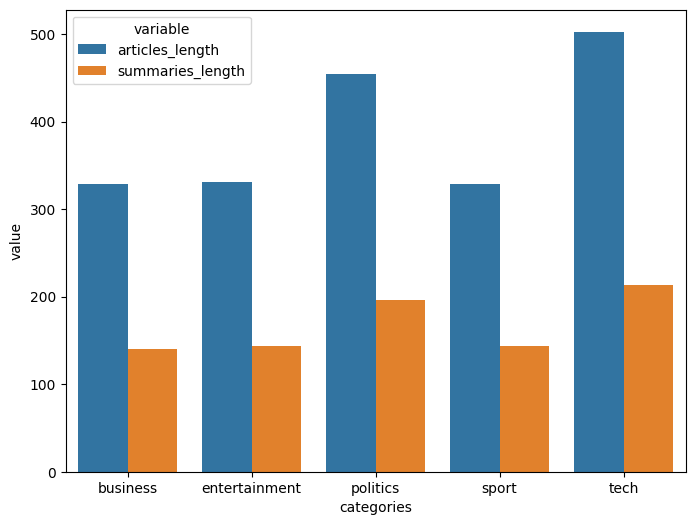

In [15]:
category_length = df.groupby('categories', 0).agg({'articles_length':'mean', 'summaries_length':'mean'})
df_m = pd.melt(category_length, ignore_index=False)
plt.figure(figsize=(8,6))
sns.barplot(x=df_m.index, y="value", hue="variable", data= df_m)
plt.show()

In [16]:
pd.melt(category_length, ignore_index=False).groupby('variable').mean()

,value
variable,
articles_length,389.086753
summaries_length,167.342848


In [17]:
!nvidia-smi

Tue Apr 30 17:12:29 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.86                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8              1W /   30W |    1437MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [18]:
# !pip install wheel
# !pip install --quiet transformers==4.38.2
# !pip install --quiet pytorch-lightning==1.2.7

In [19]:
# pip install git+https://github.com/PyTorchLightning/pytorch-lightning
# pip install transformers[torch]==4.3 
# pip install torchtext==0.15.0 torch==1.11.0 pytorch-lightning==1.2.2

In [20]:
import json
import pandas as pd
import numpy as np
import torch
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from termcolor import colored
import textwrap

from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5TokenizerFast as T5Tokenizer
)
from tqdm.auto import tqdm

In [21]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize']=16,10

In [22]:
df

,articles,summaries,categories,articles_length,summaries_length
0,Claxton hunting first major medal\n\nBritish h...,"For the first time, Claxton has only been prep...",sport,211,91
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,"The participation of O'Sullivan, currentily tr...",sport,144,49
2,Greene sets sights on world title\n\nMaurice G...,I think when I was coming up I would say there...,sport,377,177
3,IAAF launches fight against drugs\n\nThe IAAF ...,"""I am very happy to see you all, members of th...",sport,195,99
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",Ethiopia's Tirunesh Dibaba set a new world rec...,sport,161,75
...,...,...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...,tech,420,186
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...,tech,357,130
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...,tech,1050,475
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...,tech,379,137


In [23]:
df=df[['articles','summaries']]

In [24]:
df

,articles,summaries
0,Claxton hunting first major medal\n\nBritish h...,"For the first time, Claxton has only been prep..."
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,"The participation of O'Sullivan, currentily tr..."
2,Greene sets sights on world title\n\nMaurice G...,I think when I was coming up I would say there...
3,IAAF launches fight against drugs\n\nThe IAAF ...,"""I am very happy to see you all, members of th..."
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",Ethiopia's Tirunesh Dibaba set a new world rec...
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...


In [25]:
df=df.dropna()

In [26]:
df

,articles,summaries
0,Claxton hunting first major medal\n\nBritish h...,"For the first time, Claxton has only been prep..."
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,"The participation of O'Sullivan, currentily tr..."
2,Greene sets sights on world title\n\nMaurice G...,I think when I was coming up I would say there...
3,IAAF launches fight against drugs\n\nThe IAAF ...,"""I am very happy to see you all, members of th..."
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",Ethiopia's Tirunesh Dibaba set a new world rec...
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers\n\nComputer us...,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code\n\nA new European dire...,This goes to the heart of the European project...
2223,US cyber security chief resigns\n\nThe man mak...,Amit Yoran was director of the National Cyber ...


In [27]:
train_df, test_df=train_test_split(df, test_size=0.2)

In [28]:
train_df

,articles,summaries
512,Jarre joins fairytale celebration\n\nFrench mu...,Bloom is to be formally presented with the Han...
219,Curbishley delight for Johansson\n\nCharlton m...,"Curbishley said after the 4-0 win: ""There was ..."
641,Franz man seeks government help\n\nFranz Ferdi...,"The government shouldn't ""fund"" music - it sho..."
1893,Telewest to challenge Sky Plus\n\nCable firm T...,Cable firm Telewest is to offer a personal vid...
1719,Mixed Christmas for US retailers\n\nUS retaile...,Upscale department store Nordstrom said same s...
...,...,...
2012,Screensaver tackles spam websites\n\nNet users...,Net users are getting the chance to fight back...
530,Public show for Reynolds portrait\n\nSir Joshu...,It was bought by a London dealer who sold it o...
1705,Deutsche Boerse set to 'woo' LSE\n\nBosses of ...,Bosses of Deutsche Boerse and the London Stock...
1012,"CSA 'could close', says minister\n\nMinisters ...",But he said replacing the controversial CSA wo...


In [29]:
test_df

,articles,summaries
1277,Hunt ban support is 'in decline'\n\nSupport fo...,In July 1999 they asked 801 adults if they sup...
2198,Cabs collect mountain of mobiles\n\nGadgets ar...,You could be losing a fair chunk of your life ...
2095,Windows worm travels with Tetris\n\nUsers are ...,The Cellery worm installs a playable version o...
102,Duff ruled out of Barcelona clash\n\nChelsea's...,"Mourinho said: ""We have one more session but I..."
1052,Visa row mandarin made Sir John\n\nThe top civ...,A Department for Work and Pensions spokeswoman...
...,...,...
1036,UK helps raped Rwandan women\n\nBritain is to ...,The plight of the infected women was overshado...
1939,Fast moving phone bugs appear\n\nSecurity firm...,The new strains of the Cabir mobile phone viru...
2049,"Millions to miss out on the net\n\nBy 2025, 40...",Although the percentage of Britons without hom...
887,UK Directors Guild nominees named\n\nMartin Sc...,Mike Leigh's Vera Drake is among the nominees ...


In [30]:
#creating pytorch dataset
class NewsSummaryDataset(Dataset):
  def __init__(self, data: pd.DataFrame, tokenizer:T5Tokenizer, text_max_token_len: int = 512, summary_max_token_len: int = 128):
    self.tokenizer = tokenizer
    self.data = data
    self.text_max_token_len = text_max_token_len
    self.summary_max_token_len = summary_max_token_len
  def __len__(self):
    return len(self.data)

  def __getitem__(self,index: int):
    data_row = self.data.iloc[index]

    text = data_row['articles']

    text_encoding = tokenizer(
        text,
        max_length=self.text_max_token_len, #max length=512
        padding='max_length',
        truncation=True,
        return_attention_mask = True,
        add_special_tokens=True,
        return_tensors='pt'
    )
    summary_encoding = tokenizer(
        data_row['summaries'],
        max_length=self.summary_max_token_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors='pt'
    )

    labels = summary_encoding['input_ids']
    # Ensure we have correct labels for T5 generation
    labels[labels==0] = -100 

    return dict(
        text=text,
        summary=data_row['summaries'],
        text_input_ids=text_encoding['input_ids'].flatten(),
        text_attention_mask=text_encoding['attention_mask'].flatten(),
        labels=labels.flatten(),
        labels_attention_mask=summary_encoding['attention_mask'].flatten()
    )

In [31]:
test_df

,articles,summaries
1277,Hunt ban support is 'in decline'\n\nSupport fo...,In July 1999 they asked 801 adults if they sup...
2198,Cabs collect mountain of mobiles\n\nGadgets ar...,You could be losing a fair chunk of your life ...
2095,Windows worm travels with Tetris\n\nUsers are ...,The Cellery worm installs a playable version o...
102,Duff ruled out of Barcelona clash\n\nChelsea's...,"Mourinho said: ""We have one more session but I..."
1052,Visa row mandarin made Sir John\n\nThe top civ...,A Department for Work and Pensions spokeswoman...
...,...,...
1036,UK helps raped Rwandan women\n\nBritain is to ...,The plight of the infected women was overshado...
1939,Fast moving phone bugs appear\n\nSecurity firm...,The new strains of the Cabir mobile phone viru...
2049,"Millions to miss out on the net\n\nBy 2025, 40...",Although the percentage of Britons without hom...
887,UK Directors Guild nominees named\n\nMartin Sc...,Mike Leigh's Vera Drake is among the nominees ...


In [32]:
class NewsSummaryDataModule(pl.LightningDataModule):
  def __init__(
      self,
      train_df: pd.DataFrame,
      test_df: pd.DataFrame,
      tokenizer: T5Tokenizer,
      batch_size: int = 8,
      text_max_token_len: int=512,
      summary_max_token_len: int=128
  ):
      super().__init__()

      self.train_df = train_df
      self.test_df = test_df
      self.batch_size = batch_size
      self.tokenizer = tokenizer
      self.text_max_token_len = text_max_token_len
      self.summary_max_token_len = summary_max_token_len

  def setup(self, stage=None):
    self.train_dataset = NewsSummaryDataset(
        self.train_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )
    self.test_dataset = NewsSummaryDataset(
        self.test_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )
  def train_dataloader(self):
    return DataLoader(
        self.train_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=0
    )
  def test_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=0
    )
  def val_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=0
    )

In [33]:
MODEL_NAME = 't5-base'
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

In [34]:
text_token_counts, summary_token_counts = [], []

for _, row in train_df.iterrows():
  text_token_count = len(tokenizer.encode(row['articles']))
  text_token_counts.append(text_token_count)

  summary_token_count = len(tokenizer.encode(row['summaries']))
  text_token_counts.append(summary_token_count)

<Axes: >

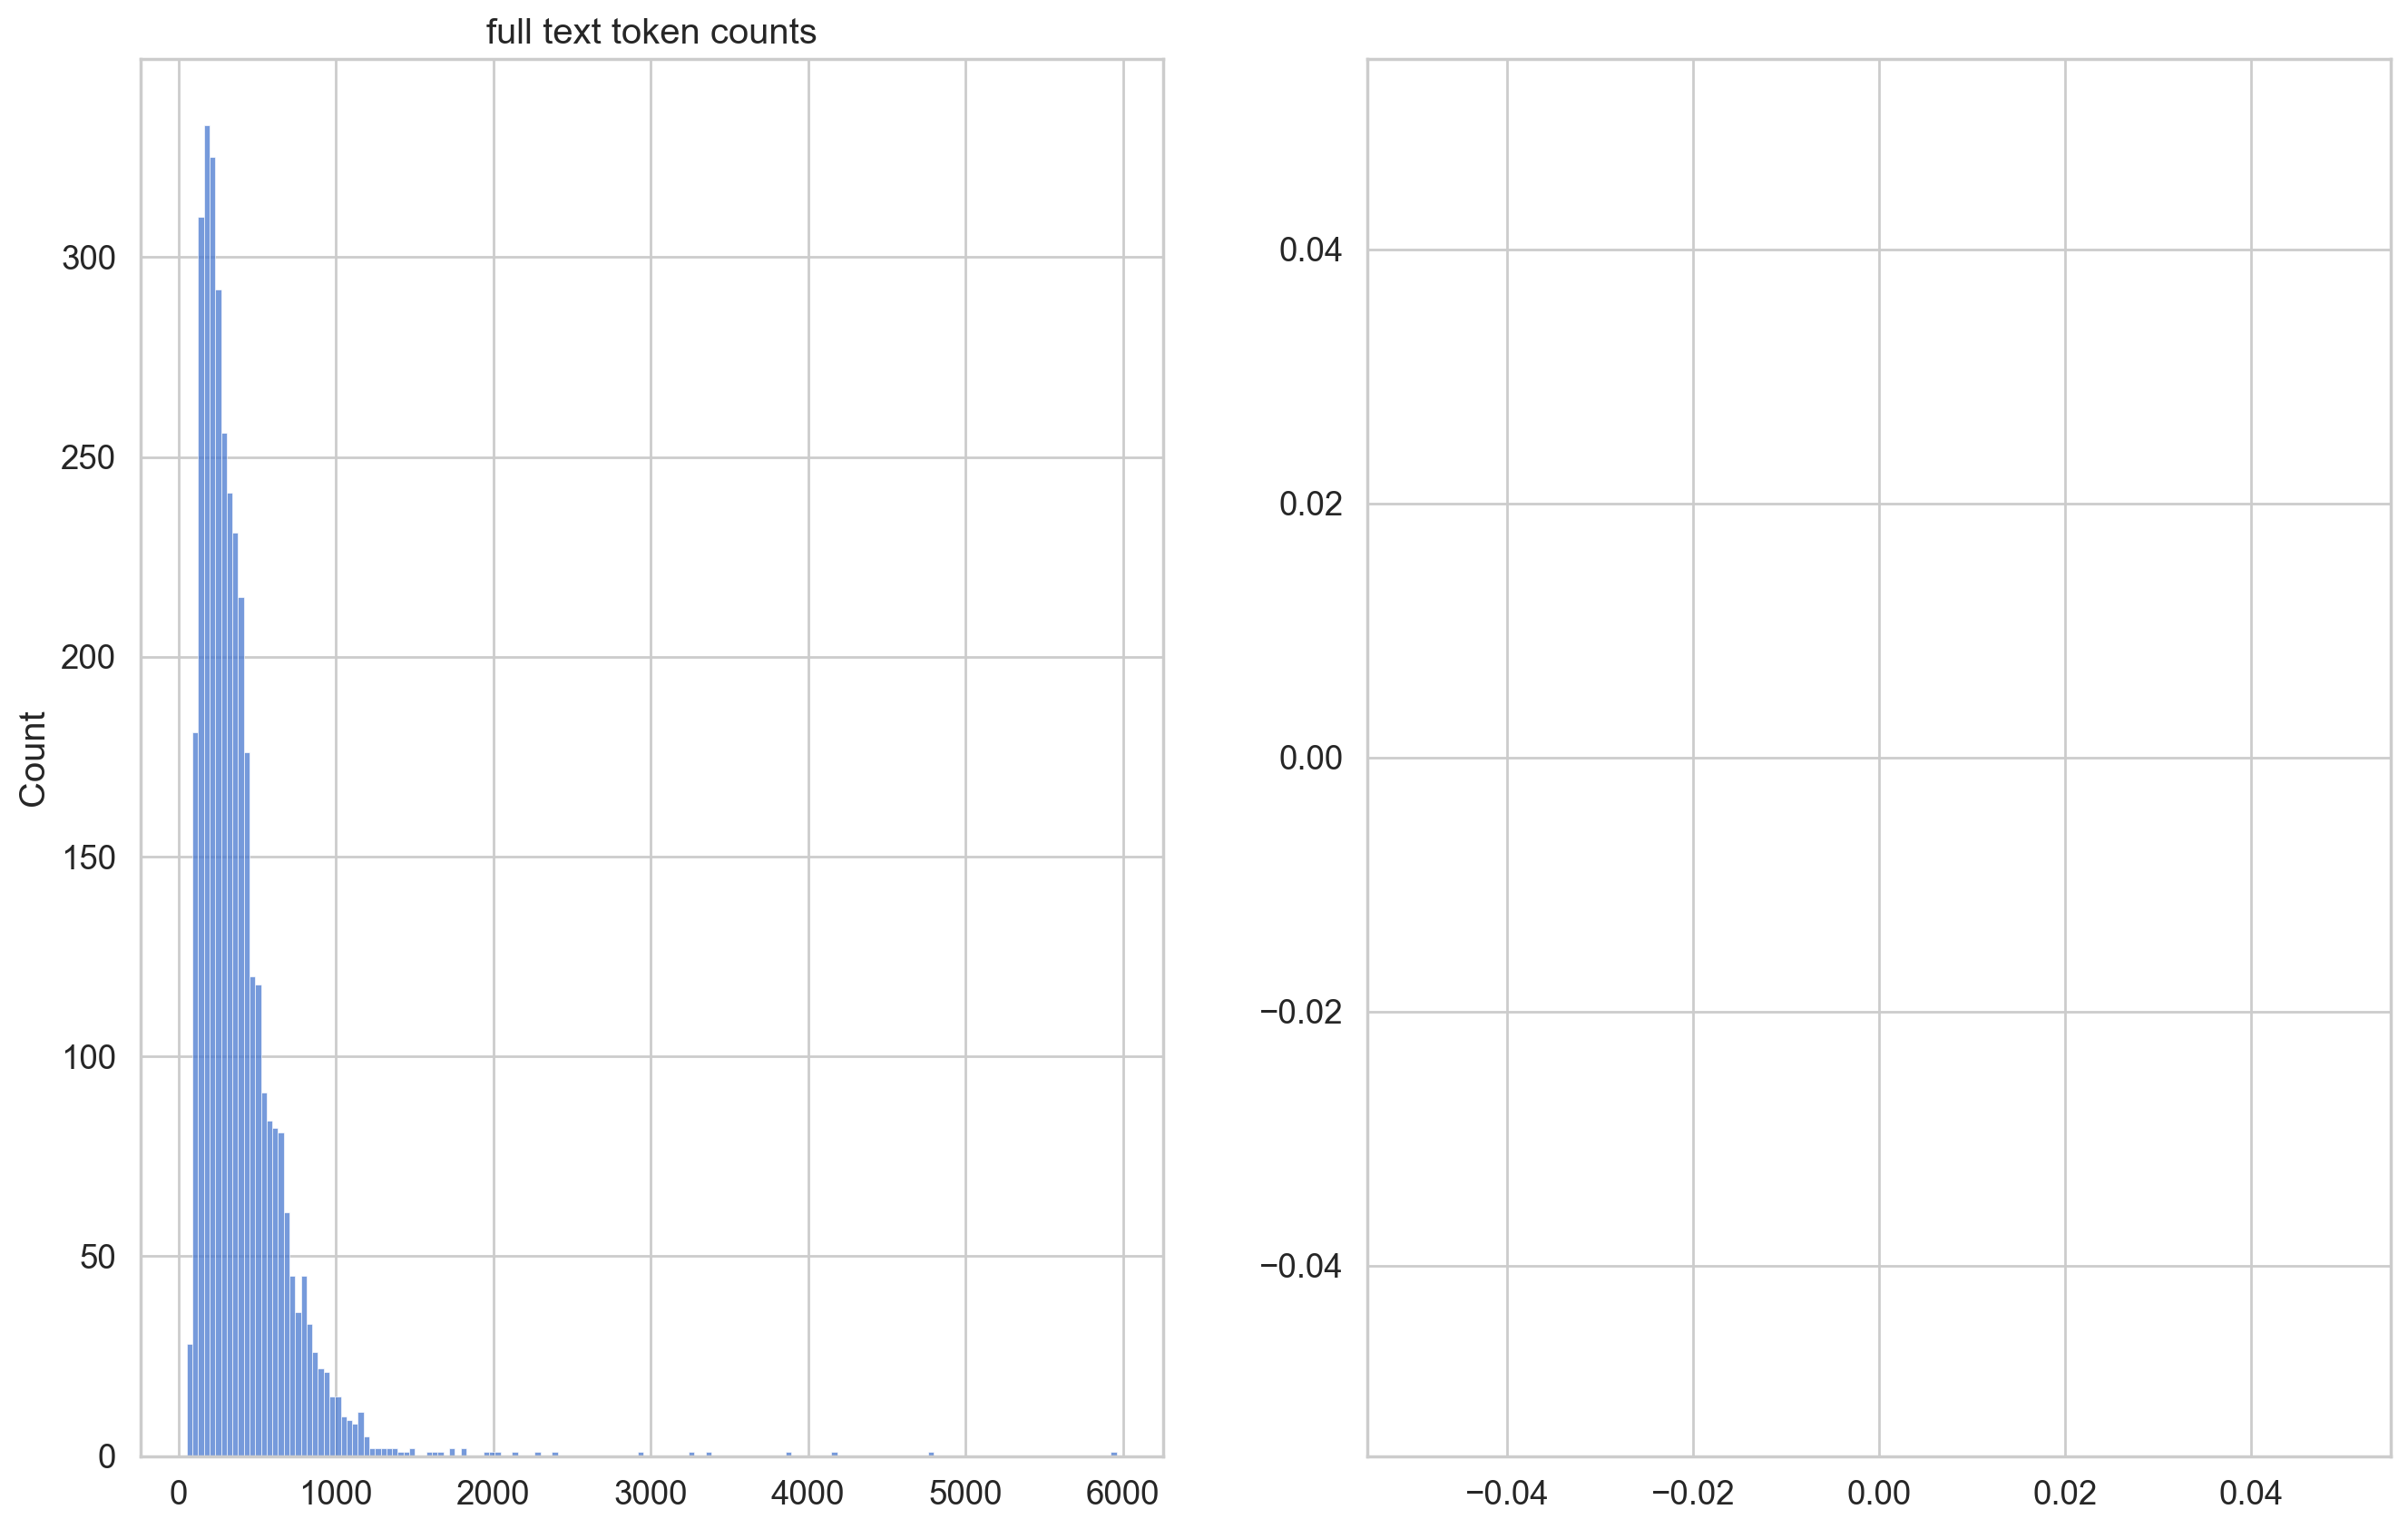

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(text_token_counts, ax=ax1)
ax1.set_title('full text token counts')
sns.histplot(summary_token_counts, ax=ax2)

In [36]:
N_EPOCHS = 1
BATCH_SIZE = 8

data_module = NewsSummaryDataModule(train_df, test_df, tokenizer, batch_size=BATCH_SIZE)

In [37]:
data_module

# Model

In [38]:
class NewsSummaryModel(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME, return_dict=True)
  
  def forward(self, input_ids, attention_mask, decoder_attention_mask, labels=None):
    # print("FORWARD")
    output=self.model(
        input_ids,
        attention_mask=attention_mask,
        labels=labels,
        decoder_attention_mask=decoder_attention_mask
    )
  
    return output.loss, output.logits

  def training_step(self, batch, batch_size):
    # print("TRAINING")
    input_ids = batch['text_input_ids']
    attention_mask = batch['text_attention_mask']
    labels = batch['labels']
    labels_attention_mask = batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask= labels_attention_mask,
        labels=labels
    )

    self.log("train_loss", loss, prog_bar=True, logger=True)
    return loss

  def validation_step(self, batch, batch_size):
    # print("VALIDATION")
    input_ids = batch['text_input_ids']
    attention_mask = batch['text_attention_mask']
    labels = batch['labels']
    labels_attention_mask = batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask=labels_attention_mask,
        labels=labels
    )

    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss
  def test_step(self, batch, batch_size):
    # print("TEST")
    input_ids = batch['text_input_ids']
    attention_mask = batch['text_attention_mask']
    labels = batch['labels']
    labels_attention_mask = batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask=labels_attention_mask,
        labels=labels
    )

    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss
  
  def configure_optimizers(self):
      optimizer = torch.optim.Adam(self.parameters(), lr=2e-5)
      return [optimizer]

In [39]:
model = NewsSummaryModel()

In [40]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/
%reload_ext tensorboard

In [41]:
checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints',
    filename='best-checkpoint',
    save_top_k=1,
    verbose=True,
    monitor='val_loss',
    mode='min'
)

logger = TensorBoardLogger("lightning_logs", name='news-summary')

trainer = pl.Trainer(
    logger=logger,
    callbacks=[checkpoint_callback],
    max_epochs=N_EPOCHS,
    # checkpoint_callback=checkpoint_callback,
    # # gpus=1,
    # progress_bar_refresh_rate=30
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [42]:
torch.cuda.empty_cache() #clear any cache

In [43]:
import gc
gc.collect() #clear any garbage collector

457

In [44]:
trainer.fit(model, data_module)

You are using a CUDA device ('NVIDIA GeForce RTX 4070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:612: UserWarning: Checkpoint directory checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estim

Sanity Checking: 0it [00:00, ?it/s]

c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:478: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 223: 'val_loss' reached 0.52077 (best 0.52077), saving model to 'checkpoints\\best-checkpoint-v2.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=1` reached.


In [46]:
# Additional information
# EPOCH = 1
PATH = "\model_t5.pt"
# LOSS = 0.4

torch.save({
            'epoch': N_EPOCHS,
            'model_state_dict': model.state_dict(),
            }, PATH)
# })

In [47]:
# working_dir = os.getcwd()
# model_path = os.path.join(working_dir, "checkpoints")
# print(model_path)
# trained_model = NewsSummaryModel.load_from_checkpoint(
#     trainer,checkpoint_callback.best_model_path(dirpath= model_path)#load the best model using checkpoint
# )
# trained_model.freeze()

trained_model = NewsSummaryModel.load_from_checkpoint(
    trainer.checkpoint_callback.best_model_path#load the best model using checkpoint
)
trained_model.freeze()

# trained_model = NewsSummaryModel.load_from_checkpoint(
#     trainer,checkpoint_callback.best_model_path#load the best model using checkpoint
# )
# trained_model.freeze()

### Summarize the text

In [48]:
# summarize the text
def summarizeText(text):
  text_encoding = tokenizer(
      text,
      max_length=512,
      padding='max_length',
      truncation=True,
      return_attention_mask=True,
      add_special_tokens=True,
      return_tensors='pt'
  )

  generated_ids = trained_model.model.generate(
      input_ids=text_encoding['input_ids'],
      attention_mask = text_encoding['attention_mask'],
      max_length=150, # maximum output text length
      num_beams=2, #using beam search
      repetition_penalty=2.5,
      length_penalty=1.0,
      early_stopping=True
  )

#decoded values
  preds = [
      tokenizer.decode(gen_id,skip_special_tokens=True, clean_up_tokenization_spaces=True)
      for gen_id in generated_ids
  ]
  return "".join(preds)

# Evaluation using Rouge

In [49]:
import evaluate

rouge_score = evaluate.load("rouge")

In [50]:
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
def compute_metrics():
# predictions, labels = eval_pred
    
    # Decode generated summaries into text
    # preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    
    # Replace -100 in the labels as we can't decode them
    # labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    
    # Decode reference summaries into text
    # decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    # ROUGE expects a newline after each sentence
    # decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    # decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
    
    # Compute ROUGE scores
    # result = rouge_score.compute(predictions=preds, references=decoded_labels, use_stemmer=True)
    result = rouge_score.compute(predictions=preds, use_stemmer=True)
    
    return {k: round(v, 4) for k, v in result.items()}

In [51]:
def print_summary():
    # article = test["test"][idx]["article"]
    # summary = dataset["test"][idx]["summary"]
    # g_summary = summarizer(dataset["test"][idx]["article"])[0]["summary_text"]
    # score = rouge_score.compute(predictions=[g_summary], references=[summary])
    # scores = {k: round(v, 4) for k, v in score.items()}
    # print(f"'>>> Article: {article}'")
    # print(f"\n'>>> Summary: {summary}'")
    # print(f"\n'>>> Generated Summary: {g_summary}'")
    # print(f"\n'>>> ROUGE Score: {scores}'")

    data = []
    for r in range(len(test_df)):
        row = test_df.iloc[r]
        art_row = row['articles']
        sum_row = row['summaries'] #actual summary from the dataset
        gen_summary = summarizeText(art_row) #generated summary for article
        score = rouge_score.compute(predictions=[gen_summary], references=[sum_row])
        scores = {k: round(v, 4) for k, v in score.items()}
        data.append([art_row, sum_row, gen_summary, scores])
        print(f"'>>> Article: {art_row}'")
        print(f"\n'>>> Summary: {sum_row}'")
        print(f"\n'>>> Generated Summary: {gen_summary}'")
        print(f"\n'>>> ROUGE Score: {scores}'")
    result=pd.DataFrame(data, columns=['articles', 'original summary', "generated summary", "score"])
    return result
    

In [52]:
result_df=print_summary()

'>>> Article: Hunt ban support is 'in decline'

Support for a ban on hunting has fallen in the past six years, a poll suggests.

Less than half the UK wants a ban compared to almost two-thirds in 1999, the Mori survey of 2,000 adults for BBC One's Countryfile programme suggests. The number opposed to a ban remains constant, but those "neither supporting nor opposing" has increased by 11%. Most city-dwellers support the ban but rural people were evenly split between supporters, opponents and undecided.

Polling company Mori carried out both surveys. In July 1999 they asked 801 adults if they supported the ban for the Mail on Sunday. For Countryfile they asked 2,234 adults across the country the same question. The Mail on Sunday survey found that 63% supported a hunting ban compared with 24% against. In the Countryfile survey, 47% said they supported the legislation, with 26% against. But the programme makers suggest the British public are becoming "increasingly neutral" to the issue bec

# Saving the results in a csv file

In [53]:
# save the results as a csv file
# articles=test_df['articles']
# original_summary = test_df['summaries']
# generated_summary=gen_summary
# result=zip(articles, original_summary, generated_summary) #maps articles to summaries into a list
pd.DataFrame.from_records(result_df).to_csv('results_t5.csv', header=["article","original_summary","generated summary","rouge_score"], index=False)

C:\Users\seoeunl\AppData\Local\Temp\ipykernel_448172\3091197502.py:6: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  pd.DataFrame.from_records(result_df).to_csv('results_t5.csv', header=["article","original_summary","generated summary","rouge_score"], index=False)
